<a href="https://colab.research.google.com/github/AadyaTiwari/Deep-Learning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv
Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train, y_train = [], []

for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

Reashaping Data

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

building the RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Initialising the RNN

In [ ]:
regressor = Sequential()

Adding the first LSTM Layer and some Dropout Regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


Adding the Second LSTM Layer and some Dropout Regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


Adding the Third LSTM LAyer and some Dropout Regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

Adding a fourth LSTM Layer and Some Drropout Regulariization

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

Adding the Output Layer

In [ ]:
regressor.add(Dense(units = 1))

Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting the RNN to the Training Set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 82ms/step - loss: 0.0385
Epoch 2/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0047
Epoch 5/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0044
Epoch 7/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0045
Epoch 13/100
38/38 [=====

Making predictions and visualising the results

Getting the Real Stock Price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_train['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


Visualising the Final Result

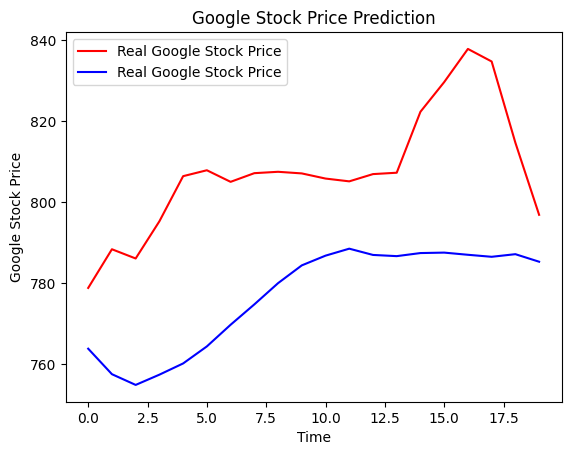

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Real Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()